In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(123)

In [2]:
df_data  = pd.read_csv('../data/week7_lab_data.csv')
all_features = ['crim', 'zn', 'indus',  'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
X = df_data[all_features]
y = df_data["medv"]
df_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Forward and Backward Stepwise Selection

In [3]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

In [4]:
feature_cols = ['crim', 'nox', 'rm',  'dis', 'rad', 'tax', 'ptratio', 'lstat']
X = df_data[feature_cols]
y = df_data["medv"]

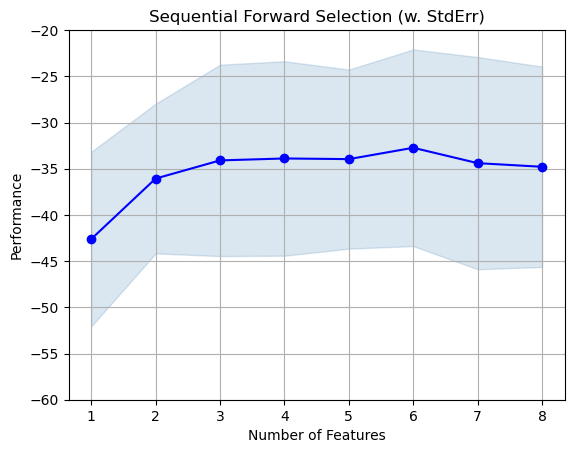

1 features:  ('lstat',)
2 features:  ('ptratio', 'lstat')
3 features:  ('rm', 'ptratio', 'lstat')
4 features:  ('crim', 'rm', 'ptratio', 'lstat')
5 features:  ('crim', 'rm', 'dis', 'ptratio', 'lstat')
6 features:  ('crim', 'nox', 'rm', 'dis', 'ptratio', 'lstat')
7 features:  ('crim', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat')
8 features:  ('crim', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat')


In [5]:
lr = LinearRegression()

sfs_forward = SequentialFeatureSelector(lr, 
          k_features=len(feature_cols), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs_forward = sfs_forward.fit(X, y)

fig_forward = plot_sequential_feature_selection(sfs_forward.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.ylim((-60,-20))
plt.show()

for k, items in sfs_forward.subsets_.items():
    print(f"{k} features: ", items["feature_names"])

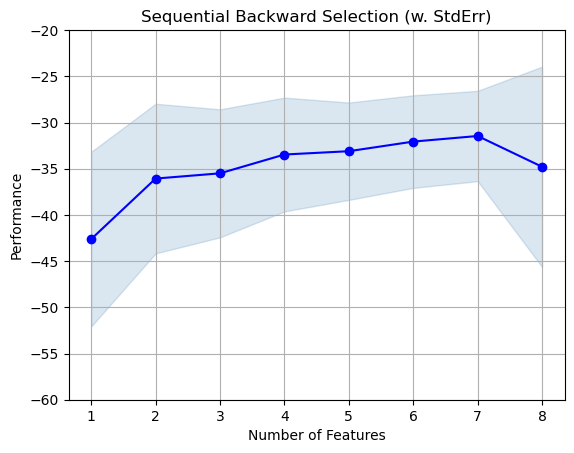

8 features:  ('crim', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat')
7 features:  ('crim', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat')
6 features:  ('nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat')
5 features:  ('nox', 'dis', 'rad', 'ptratio', 'lstat')
4 features:  ('nox', 'dis', 'ptratio', 'lstat')
3 features:  ('dis', 'ptratio', 'lstat')
2 features:  ('ptratio', 'lstat')
1 features:  ('lstat',)


In [6]:
lr = LinearRegression()

sfs_backward = SequentialFeatureSelector(lr, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs_backward = sfs_backward.fit(X, y)
fig_backward = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Selection (w. StdErr)')
plt.ylim((-60,-20))
plt.grid()
plt.show()

for k, items in sfs_backward.subsets_.items():
    print(f"{k} features: ", items["feature_names"])

## What is the "best" subset. Will document the number of features and their names.

In [7]:
X = df_data[all_features]
y = df_data["medv"]

sfs_forward_all = SequentialFeatureSelector(lr, 
          k_features=len(all_features), 
          forward=True, 
          floating=False, 
          scoring="neg_mean_squared_error",
          cv=5)
sfs_forward_all = sfs_forward_all.fit(X, y)

for k, items in sfs_forward_all.subsets_.items():
    print(f"{k} features (Forward): ", items["feature_names"])

sfs_backward_all = SequentialFeatureSelector(lr, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring="neg_mean_squared_error",
          cv=5)
sfs_backward_all = sfs_backward_all.fit(X, y)

for k, items in sfs_backward_all.subsets_.items():
    print(f"{k} features (Backward): ", items["feature_names"])

1 features (Forward):  ('lstat',)
2 features (Forward):  ('ptratio', 'lstat')
3 features (Forward):  ('rm', 'ptratio', 'lstat')
4 features (Forward):  ('chas', 'rm', 'ptratio', 'lstat')
5 features (Forward):  ('crim', 'chas', 'rm', 'ptratio', 'lstat')
6 features (Forward):  ('crim', 'chas', 'rm', 'dis', 'ptratio', 'lstat')
7 features (Forward):  ('crim', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'lstat')
8 features (Forward):  ('crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'lstat')
9 features (Forward):  ('crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'b', 'lstat')
10 features (Forward):  ('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'ptratio', 'b', 'lstat')
11 features (Forward):  ('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'ptratio', 'b', 'lstat')
12 features (Forward):  ('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat')
13 features (Forward):  ('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad'

Forward selection shows that adding more features generally increases the model complexity. The jump from 4 to 5 features, where crim is added to chas, rm, ptratio, and lstat, seems to be a significant point. Beyond this, more features contribute less to the predictive power, as indicated by the diminishing returns in feature significance. Backward selection shows a similar pattern, where reducing from 9 to 8 features crim, zn, nox, dis, rad, tax, ptratio, b, lstat to zn, nox, dis, rad, tax', ptratio,b, lstat) doesn't eliminate a critical predictor. I think the best subset is 5 that includes crim, chas, rm, ptratio, and lstat because it is balanced between model simplicity and predictive power. It includes variables that are important in predicting house prices, like room number rm, neighborhood crime rate crim, and social demographics lstat, ptratio. Adding more features beyond this doesn't significantly improve the model's performance to justify the added complexity.

# Ridge regression and Lasso regression

In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso

In [9]:
X = df_data[all_features]
y = df_data["medv"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
clf_lr = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor',LinearRegression()),
])

In [12]:
clf_lr.fit(X_train,y_train)
y_pred_lr = clf_lr.predict(X_test)
print("------LR------")
print("LR train R2 score: %0.6f" % clf_lr.score(X_train, y_train))
print("LR test R2 score: %0.6f" % clf_lr.score(X_test, y_test))
print(clf_lr.named_steps['L_regressor'].coef_)

------LR------
LR train R2 score: 0.739234
LR test R2 score: 0.726157
[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


## Ridge Regression

In [13]:
clf_ridge = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor', Ridge(alpha=0.1)),
]) 

clf_ridge.fit(X_train,y_train)
y_pred_ridge = clf_ridge.predict(X_test)
print("------Ridge------")
print("Ridge train R2 score: %0.6f" % clf_ridge.score(X_train, y_train))
print("Ridge test R2 score: %0.6f" % clf_ridge.score(X_test, y_test))
print(clf_ridge.named_steps['L_regressor'].coef_)

------Ridge------
Ridge train R2 score: 0.739234
Ridge test R2 score: 0.726120
[-0.98722604  0.86567745  0.40197774  0.86241287 -1.89608318  2.80888802
 -0.35892745 -3.04108762  2.02423176 -1.35675167 -2.08123083  1.04099697
 -3.92476674]


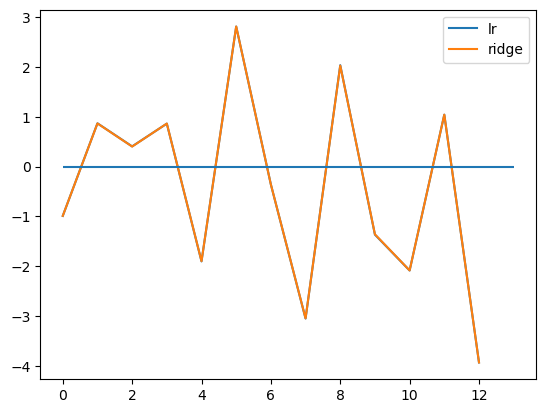

In [14]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

In [ ]:
# larger lambda will push coefficient towards zero
clf_ridge = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor', Ridge(alpha=100)),
]) 

clf_ridge.fit(X_train,y_train)
y_pred_ridge = clf_ridge.predict(X_test)
print("------Ridge------")
print("Ridge train R2 score: %0.6f" % clf_ridge.score(X_train, y_train))
print("Ridge test R2 score: %0.6f" % clf_ridge.score(X_test, y_test))
print(clf_ridge.named_steps['L_regressor'].coef_)

------Ridge------
Ridge train R2 score: 0.711332
Ridge test R2 score: 0.696690
[-0.62465551  0.36705687 -0.23889316  0.94899585 -0.70011357  2.6925179
 -0.32541473 -1.31245885  0.29116678 -0.36977324 -1.54579918  0.85266916
 -2.95976482]


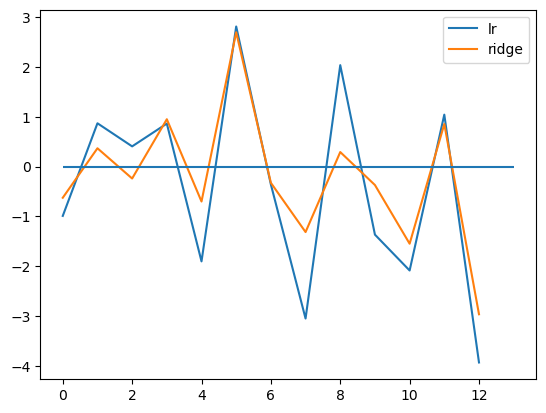

In [16]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

## Lasso Regression

In [17]:
clf_lasso = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor',Lasso(alpha=0.1)),
]) 

clf_lasso.fit(X_train,y_train)
y_pred_lasso = clf_lasso.predict(X_test)
print("------Lasso------")
print("Lasso train R2 score: %0.6f" % clf_lasso.score(X_train, y_train))
print("Lasso test R2 score: %0.6f" % clf_lasso.score(X_test, y_test))
print(clf_lasso.named_steps['L_regressor'].coef_)

------Lasso------
Lasso train R2 score: 0.733414
Lasso test R2 score: 0.711239
[-0.66991383  0.43061628 -0.          0.87630476 -1.36149475  2.89584589
 -0.18487001 -2.25812838  0.46253968 -0.         -1.90039821  0.9373862
 -3.95913625]


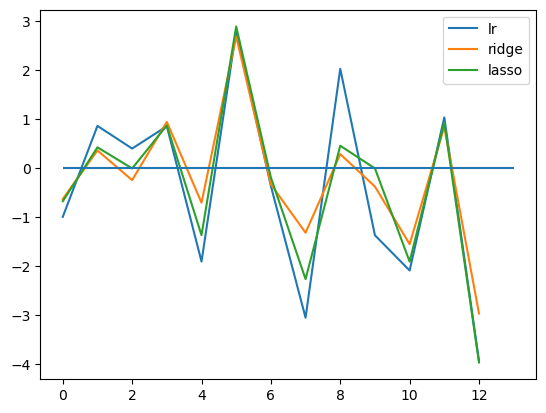

In [18]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.plot(clf_lasso.named_steps['L_regressor'].coef_, label = "lasso")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

In [19]:
# Select features with larger lambda (named alpha in sklearn library)
clf_lasso = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor',Lasso(alpha=1)),
]) 

clf_lasso.fit(X_train,y_train)
y_pred_lasso = clf_lasso.predict(X_test)
print("------Lasso------")
print("Lasso train R2 score: %0.6f" % clf_lasso.score(X_train, y_train))
print("Lasso test R2 score: %0.6f" % clf_lasso.score(X_test, y_test))
print(clf_lasso.named_steps['L_regressor'].coef_)

------Lasso------
Lasso train R2 score: 0.672413
Lasso test R2 score: 0.654243
[-0.          0.         -0.          0.27140271 -0.          2.62932147
 -0.         -0.         -0.         -0.         -1.21106809  0.29872625
 -3.81788375]


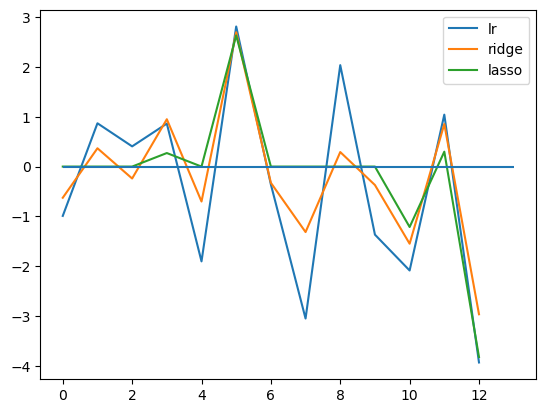

In [20]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.plot(clf_lasso.named_steps['L_regressor'].coef_, label = "lasso")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

## Coefficient Profiles

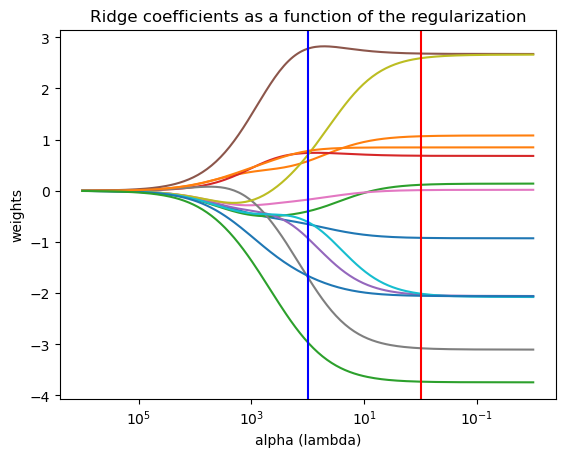

In [21]:
n_alphas = 200
alphas = np.logspace(-2, 6, n_alphas)
coefs = []
for a in alphas:
    ridge = Pipeline([
        ('std_scaler', StandardScaler()),
        ('L_regressor', Ridge(alpha=a)),
    ]) 
#     ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.named_steps['L_regressor'].coef_)

    ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha (lambda)')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.axvline(1, c='red')
plt.axvline(100, c='blue')

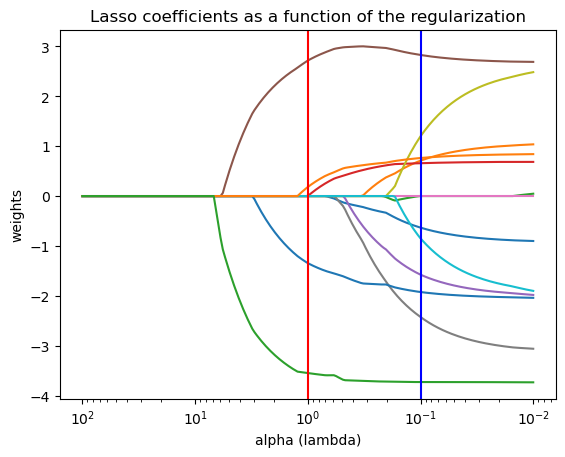

In [22]:
n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas)
coefs = []
for a in alphas:
    ridge = Pipeline([
        ('std_scaler', StandardScaler()),
        ('L_regressor', Lasso(alpha=a)),
    ]) 
#     ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.named_steps['L_regressor'].coef_)

    ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha (lambda)')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.axvline(1, c='red')
plt.axvline(0.1, c='blue')

## Will plot out the coefficient profiles for both Ridge Regression and Lasso Regression.

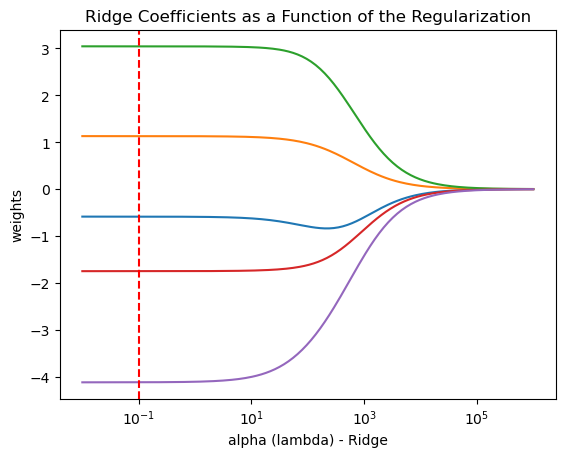

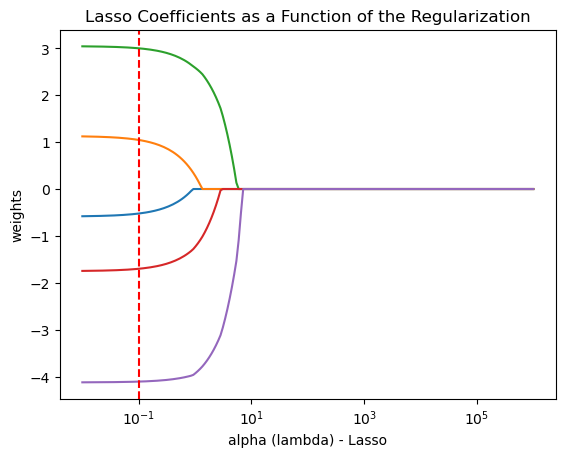

In [23]:
X_subset = df_data[["crim", "chas", "rm", "ptratio", "lstat"]]
y_subset = df_data["medv"]

X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.33, random_state=42)

n_alphas = 200
alphas = np.logspace(-2, 6, n_alphas)

ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = Pipeline([
        ("std_scaler", StandardScaler()),
        ("ridge_regressor", Ridge(alpha=a)),
    ])
    ridge.fit(X_train_subset, y_train_subset)
    ridge_coefs.append(ridge.named_steps.ridge_regressor.coef_)

for a in alphas:
    lasso = Pipeline([
        ("std_scaler", StandardScaler()),
        ("lasso_regressor", Lasso(alpha=a)),
    ])
    lasso.fit(X_train_subset, y_train_subset)
    lasso_coefs.append(lasso.named_steps.lasso_regressor.coef_)

ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale("log")
plt.xlabel("alpha (lambda) - Ridge")
plt.ylabel("weights")
plt.title("Ridge Coefficients as a Function of the Regularization")
plt.axis('tight')
plt.axvline(x=0.1, color="red", linestyle="--")
plt.show()

ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale("log")
plt.xlabel("alpha (lambda) - Lasso")
plt.ylabel("weights")
plt.title("Lasso Coefficients as a Function of the Regularization")
plt.axis("tight")
plt.axvline(x=0.1, color="red", linestyle="--")
plt.show()

If I pick the alpha value for Ridge and Lasso regression I need to find a balance where the model is regularized enough to prevent overfitting by shrinking or eliminating coefficients but not so much that it loses important predictive information, leading to underfitting. The ideal alpha minimizes prediction error by maintaining this balance between bias and variance.